In [208]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [209]:
data = pd.read_csv("titanic.csv")
data.describe


<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [210]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [212]:
data= data.drop(columns="Cabin", axis=1)

In [213]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [214]:
data["Age"].fillna(data["Age"].mode()[0], inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_24420\939265755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mode()[0], inplace=True)


In [215]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [216]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_24420\3644085981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


In [217]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [218]:
data.replace({"Sex":{"male":0, "female":1}, "Embarked":{"S":0, "C":1, "Q":2}}, inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_24420\634892552.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Sex":{"male":0, "female":1}, "Embarked":{"S":0, "C":1, "Q":2}}, inplace=True)


In [219]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [220]:
X_train= data.drop(columns=["Name", "Ticket", "Survived"], axis=1)
Y_train= data["Survived"]


In [221]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [222]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [223]:
counts = Y_train.value_counts()
print("Number of 0s (Did not survive):", counts[0])
print("Number of 1s (Survived):", counts[1])

Number of 0s (Did not survive): 549
Number of 1s (Survived): 342


### Model training using unbalanced data

In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state=42, stratify=Y_train)

In [225]:
Model_RF = RandomForestClassifier(random_state=42)

In [226]:
Model_svm = svm.SVC()

In [227]:
Model_RF.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [228]:
#SVM Model
Model_svm.fit(X_train, Y_train)

SVC()

In [229]:
k = 10
Model_KNN= KNeighborsClassifier(n_neighbors=k)
Model_KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [230]:
Y_pred_RF = Model_RF.predict(X_test)
print("Results without balancing:")
print("Accuracy:", round(accuracy_score(Y_test, Y_pred_RF), 3)*100)
print("f1 score is:",f1_score(Y_test, Y_pred_RF)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_RF))
print("Classification Report:\n", classification_report(Y_test, Y_pred_RF))

Results without balancing:
Accuracy: 81.6
f1 score is: 74.80916030534351
Confusion Matrix:
 [[97 13]
 [20 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [231]:
#Prediction using SVM
Y_pred_svm = Model_svm.predict(X_test)
print("Prediction using SVM Model--------------------\n")
print("Results without balancing:")
print("Accuracy:", round(accuracy_score(Y_test, Y_pred_svm), 3)*100)
print("f1 score is:",f1_score(Y_test, Y_pred_svm)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_svm))
print("Classification Report:\n", classification_report(Y_test, Y_pred_svm))

Prediction using SVM Model--------------------

Results without balancing:
Accuracy: 65.4
f1 score is: 26.190476190476193
Confusion Matrix:
 [[106   4]
 [ 58  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.96      0.77       110
           1       0.73      0.16      0.26        69

    accuracy                           0.65       179
   macro avg       0.69      0.56      0.52       179
weighted avg       0.68      0.65      0.58       179



In [232]:
#Prediction using KNN
Y_pred_KNN = Model_KNN.predict(X_test)
print("Prediction using KNN Model--------------------\n")
print("Results without balancing:")
print("Accuracy:", round(accuracy_score(Y_test, Y_pred_KNN), 3)*100)
print("f1 score is:",f1_score(Y_test, Y_pred_KNN)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_KNN))
print("Classification Report:\n", classification_report(Y_test, Y_pred_KNN))

Prediction using KNN Model--------------------

Results without balancing:
Accuracy: 64.2
f1 score is: 34.69387755102041
Confusion Matrix:
 [[98 12]
 [52 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75       110
           1       0.59      0.25      0.35        69

    accuracy                           0.64       179
   macro avg       0.62      0.57      0.55       179
weighted avg       0.63      0.64      0.60       179



### Model training using balanced data(Oversampling)

In [233]:
smote = SMOTE(random_state=42)

In [234]:
X_train_bal, Y_train_bal = smote.fit_resample(X_train, Y_train)

In [235]:
counts = Y_train_bal.value_counts()
print("Number of 0s (Did not survive):", counts[0])
print("Number of 1s (Survived):", counts[1])

Number of 0s (Did not survive): 439
Number of 1s (Survived): 439


In [236]:
Model_bal_RF = RandomForestClassifier(random_state=42)

In [237]:
Model_bal_svm = svm.SVC()

In [238]:
k = 10
Model_bal_KNN= KNeighborsClassifier(n_neighbors=k)

In [239]:
Model_bal_RF.fit(X_train_bal, Y_train_bal)

RandomForestClassifier(random_state=42)

In [240]:
Model_bal_svm.fit(X_train_bal, Y_train_bal)

SVC()

In [241]:
Model_bal_KNN.fit(X_train_bal, Y_train_bal)

KNeighborsClassifier(n_neighbors=10)

In [242]:
y_pred_bal_RF = Model_bal_RF.predict(X_test)

In [243]:
y_pred_bal_svm = Model_bal_svm.predict(X_test)

In [244]:
y_pred_bal_KNN = Model_bal_KNN.predict(X_test)

In [245]:
print("\nResults with balancing:")
print("Accuracy:", round(accuracy_score(Y_test, y_pred_bal_RF),2)*100)
print("f1 score is:",f1_score(Y_test, y_pred_bal_RF)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_bal_RF))
print("Classification Report:\n", classification_report(Y_test, y_pred_bal_RF))


Results with balancing:
Accuracy: 81.0
f1 score is: 76.71232876712328
Confusion Matrix:
 [[89 21]
 [13 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.73      0.81      0.77        69

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



In [246]:
print("\nResults with balancing using SVM:\n")
print("Accuracy:", round(accuracy_score(Y_test, y_pred_bal_svm),2)*100)
print("f1 score is:",f1_score(Y_test, y_pred_bal_svm)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_bal_svm))
print("Classification Report:\n", classification_report(Y_test, y_pred_bal_svm))


Results with balancing using SVM:

Accuracy: 65.0
f1 score is: 35.051546391752574
Confusion Matrix:
 [[99 11]
 [52 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.90      0.76       110
           1       0.61      0.25      0.35        69

    accuracy                           0.65       179
   macro avg       0.63      0.57      0.55       179
weighted avg       0.64      0.65      0.60       179



In [247]:
print("\nResults with balancing:")
print("Accuracy:", round(accuracy_score(Y_test, y_pred_bal_KNN),2)*100)
print("f1 score is:",f1_score(Y_test, y_pred_bal_KNN)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_bal_KNN))
print("Classification Report:\n", classification_report(Y_test, y_pred_bal_KNN))


Results with balancing:
Accuracy: 63.0
f1 score is: 49.62406015037594
Confusion Matrix:
 [[79 31]
 [36 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70       110
           1       0.52      0.48      0.50        69

    accuracy                           0.63       179
   macro avg       0.60      0.60      0.60       179
weighted avg       0.62      0.63      0.62       179



### Model training using balanced data(Undersampling)

In [248]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, Y_train)

In [249]:
#prediction using SVM
undersampler_svm = RandomUnderSampler(random_state=42)
X_train_under_svm, y_train_under_svm = undersampler_svm.fit_resample(X_train, Y_train)

In [250]:
#Prediction using KNN
undersampler_KNN = RandomUnderSampler(random_state=42)
X_train_under_KNN, y_train_under_KNN = undersampler_KNN.fit_resample(X_train, Y_train)

In [251]:
counts = y_train_under.value_counts()
print("Number of 0s (Did not survive):", counts[0])
print("Number of 1s (Survived):", counts[1])

Number of 0s (Did not survive): 273
Number of 1s (Survived): 273


In [252]:
clf_under_RF = RandomForestClassifier(random_state=42)
clf_under_RF.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=42)

In [253]:
#Prediction using SVM
clf_under_svm = svm.SVC()
clf_under_svm.fit(X_train_under_svm, y_train_under_svm)

SVC()

In [254]:
clf_under_KNN = KNeighborsClassifier(n_neighbors=k)
clf_under_KNN.fit(X_train_under_KNN, y_train_under_KNN)

KNeighborsClassifier(n_neighbors=10)

In [255]:
y_pred_under = clf_under_RF.predict(X_test)

In [256]:
#SVM
y_pred_bal_svm = clf_under_svm.predict(X_test)

In [257]:
#KNN
y_pred_bal_KNN = clf_under_KNN.predict(X_test)

In [258]:
print("Accuracy (after undersampling):", accuracy_score(Y_test, y_pred_under)*100)
print("Confusion Matrix (after undersampling):\n", confusion_matrix(Y_test, y_pred_under)*100)
print("Classification Report (after undersampling):\n", classification_report(Y_test, y_pred_under))

Accuracy (after undersampling): 74.86033519553072
Confusion Matrix (after undersampling):
 [[8300 2700]
 [1800 5100]]
Classification Report (after undersampling):
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       110
           1       0.65      0.74      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.75       179



In [259]:
print("Prediction using SVM Model--------------------\n")
print("Accuracy (after undersampling using SVM):", accuracy_score(Y_test, y_pred_bal_svm)*100)
print("Confusion Matrix (after undersampling using SVM):\n", confusion_matrix(Y_test, y_pred_bal_svm)*100)
print("Classification Report (after undersampling using SVM):\n", classification_report(Y_test, y_pred_bal_svm))

Prediction using SVM Model--------------------

Accuracy (after undersampling using SVM): 64.80446927374301
Confusion Matrix (after undersampling using SVM):
 [[10200   800]
 [ 5500  1400]]
Classification Report (after undersampling using SVM):
               precision    recall  f1-score   support

           0       0.65      0.93      0.76       110
           1       0.64      0.20      0.31        69

    accuracy                           0.65       179
   macro avg       0.64      0.57      0.54       179
weighted avg       0.64      0.65      0.59       179



In [260]:
print("Prediction using KNN Model--------------------\n")
print("Accuracy (after undersampling using KNN):", accuracy_score(Y_test, y_pred_bal_KNN)*100)
print("Confusion Matrix (after undersampling using KNN):\n", confusion_matrix(Y_test, y_pred_bal_KNN)*100)
print("Classification Report (after undersampling using KNN):\n", classification_report(Y_test, y_pred_bal_KNN))

Prediction using KNN Model--------------------

Accuracy (after undersampling using KNN): 60.893854748603346
Confusion Matrix (after undersampling using KNN):
 [[8400 2600]
 [4400 2500]]
Classification Report (after undersampling using KNN):
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       110
           1       0.49      0.36      0.42        69

    accuracy                           0.61       179
   macro avg       0.57      0.56      0.56       179
weighted avg       0.59      0.61      0.59       179



### Model training using Scalled data

In [261]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,24.0,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1


In [262]:
scaler = StandardScaler()
columns = ["Pclass","Age","Embarked","Fare","SibSp","Parch"]
data[columns] = scaler.fit_transform(data[columns])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,0.827377,"Braund, Mr. Owen Harris",0,-0.497793,0.432793,-0.473674,A/5 21171,-0.502445,-0.568837
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.715048,0.432793,-0.473674,PC 17599,0.786845,1.005181
2,3,1,0.827377,"Heikkinen, Miss. Laina",1,-0.194583,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,-0.568837
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.487640,0.432793,-0.473674,113803,0.420730,-0.568837
4,5,0,0.827377,"Allen, Mr. William Henry",0,0.487640,-0.474545,-0.473674,373450,-0.486337,-0.568837


In [263]:
X_scal= data.drop(columns=["Name", "Ticket", "Survived"], axis=1)
Y_scal= data["Survived"]

In [264]:
X_train_scal, X_test_scal, Y_train_scal, Y_test_scal = train_test_split(
    X_scal,Y_scal, test_size=0.2, random_state=42)

In [265]:
Model_RF.fit(X_train_scal, Y_train_scal)

RandomForestClassifier(random_state=42)

In [266]:
Model_svm.fit(X_train_scal, Y_train_scal)

SVC()

In [267]:
Model_KNN.fit(X_train_scal, Y_train_scal)

KNeighborsClassifier(n_neighbors=10)

In [268]:
Y_pred_scal_RF= Model_RF.predict(X_test_scal)

In [269]:
print("Prediction using RF Model--------------------\n")
print("Accuracy (after undersampling using KNN):", accuracy_score(Y_test_scal, Y_pred_scal_RF)*100)
print("Confusion Matrix (after undersampling using KNN):\n", confusion_matrix(Y_test_scal, Y_pred_scal_RF)*100)
print("Classification Report (after undersampling using KNN):\n", classification_report(Y_test_scal, Y_pred_scal_RF))

Prediction using RF Model--------------------

Accuracy (after undersampling using KNN): 82.68156424581005
Confusion Matrix (after undersampling using KNN):
 [[9200 1300]
 [1800 5600]]
Classification Report (after undersampling using KNN):
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [270]:
Y_pred_scal_svm= Model_svm.predict(X_test_scal)

In [271]:
print("Prediction using SVM Model--------------------\n")
print("Accuracy (after undersampling using KNN):", accuracy_score(Y_test_scal, Y_pred_scal_svm)*100)
print("Confusion Matrix (after undersampling using KNN):\n", confusion_matrix(Y_test_scal, Y_pred_scal_svm)*100)
print("Classification Report (after undersampling using KNN):\n", classification_report(Y_test_scal, Y_pred_scal_svm))

Prediction using SVM Model--------------------

Accuracy (after undersampling using KNN): 58.659217877094974
Confusion Matrix (after undersampling using KNN):
 [[10500     0]
 [ 7400     0]]
Classification Report (after undersampling using KNN):
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [272]:
Y_pred_scal_KNN= Model_KNN.predict(X_test_scal)

In [273]:
print("Prediction using KNN Model--------------------\n")
print("Accuracy (after undersampling using KNN):", accuracy_score(Y_test_scal, Y_pred_scal_KNN)*100)
print("Confusion Matrix (after undersampling using KNN):\n", confusion_matrix(Y_test_scal, Y_pred_scal_KNN)*100)
print("Classification Report (after undersampling using KNN):\n", classification_report(Y_test_scal, Y_pred_scal_KNN))

Prediction using KNN Model--------------------

Accuracy (after undersampling using KNN): 56.98324022346368
Confusion Matrix (after undersampling using KNN):
 [[9000 1500]
 [6200 1200]]
Classification Report (after undersampling using KNN):
               precision    recall  f1-score   support

           0       0.59      0.86      0.70       105
           1       0.44      0.16      0.24        74

    accuracy                           0.57       179
   macro avg       0.52      0.51      0.47       179
weighted avg       0.53      0.57      0.51       179



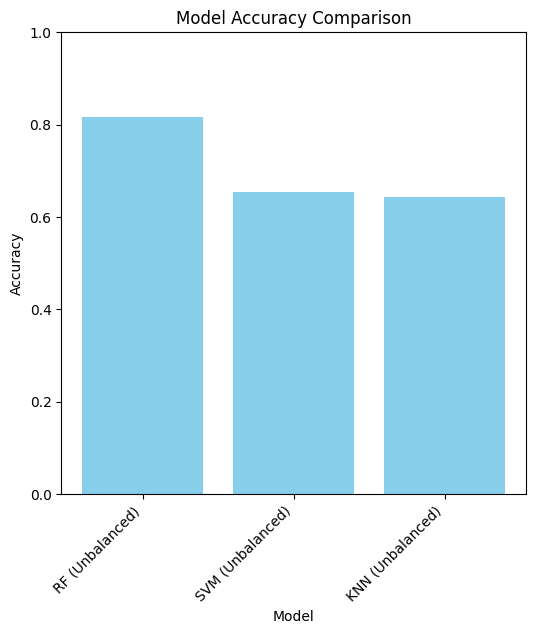

In [275]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'RF (Unbalanced)': accuracy_score(Y_test, Y_pred_RF),
    'SVM (Unbalanced)': accuracy_score(Y_test, Y_pred_svm),
    'KNN (Unbalanced)': accuracy_score(Y_test, Y_pred_KNN),    
}

# Plotting the results
plt.figure(figsize=(6, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

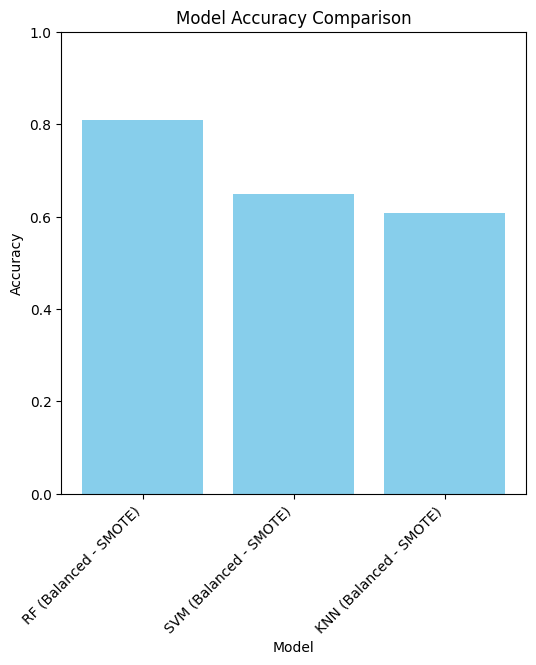

In [276]:
accuracy_scores = {    
    'RF (Balanced - SMOTE)': accuracy_score(Y_test, y_pred_bal_RF),
    'SVM (Balanced - SMOTE)': accuracy_score(Y_test, y_pred_bal_svm),
    'KNN (Balanced - SMOTE)': accuracy_score(Y_test, y_pred_bal_KNN),
}

# Plotting the results
plt.figure(figsize=(6, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

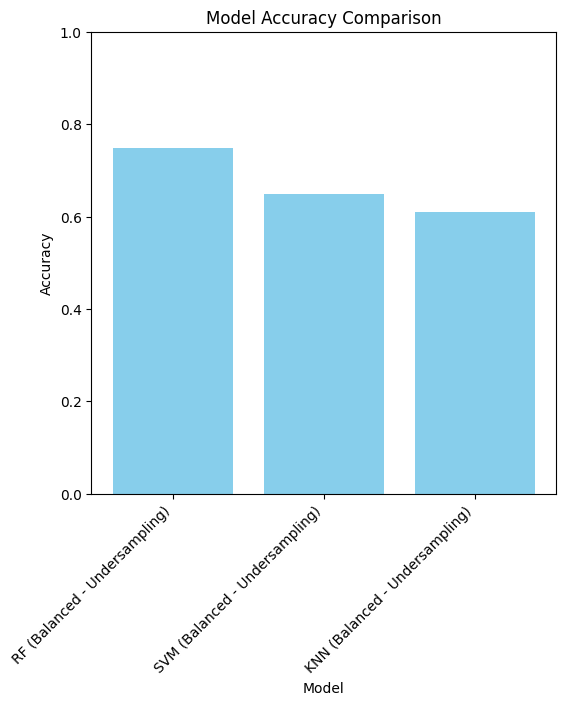

In [277]:
accuracy_scores= {
    'RF (Balanced - Undersampling)': accuracy_score(Y_test, y_pred_under),
    'SVM (Balanced - Undersampling)': accuracy_score(Y_test, y_pred_bal_svm),
    'KNN (Balanced - Undersampling)': accuracy_score(Y_test, y_pred_bal_KNN),
}

# Plotting the results
plt.figure(figsize=(6, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

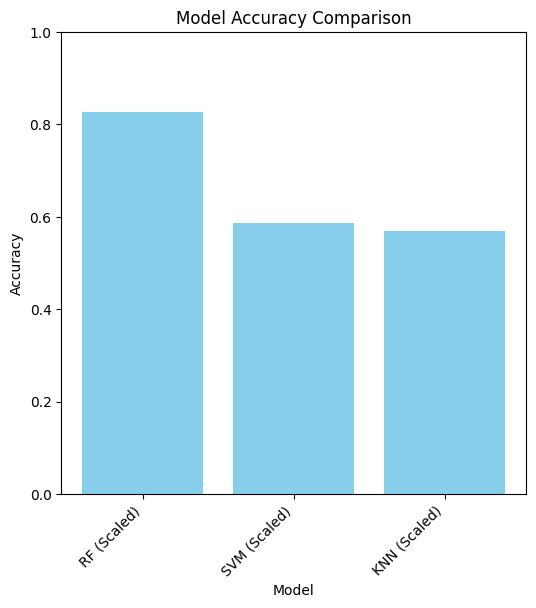

In [278]:
accuracy_scores= {
    'RF (Scaled)': accuracy_score(Y_test_scal, Y_pred_scal_RF),
    'SVM (Scaled)': accuracy_score(Y_test_scal, Y_pred_scal_svm),
    'KNN (Scaled)': accuracy_score(Y_test_scal, Y_pred_scal_KNN)
}

# Plotting the results
plt.figure(figsize=(6, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

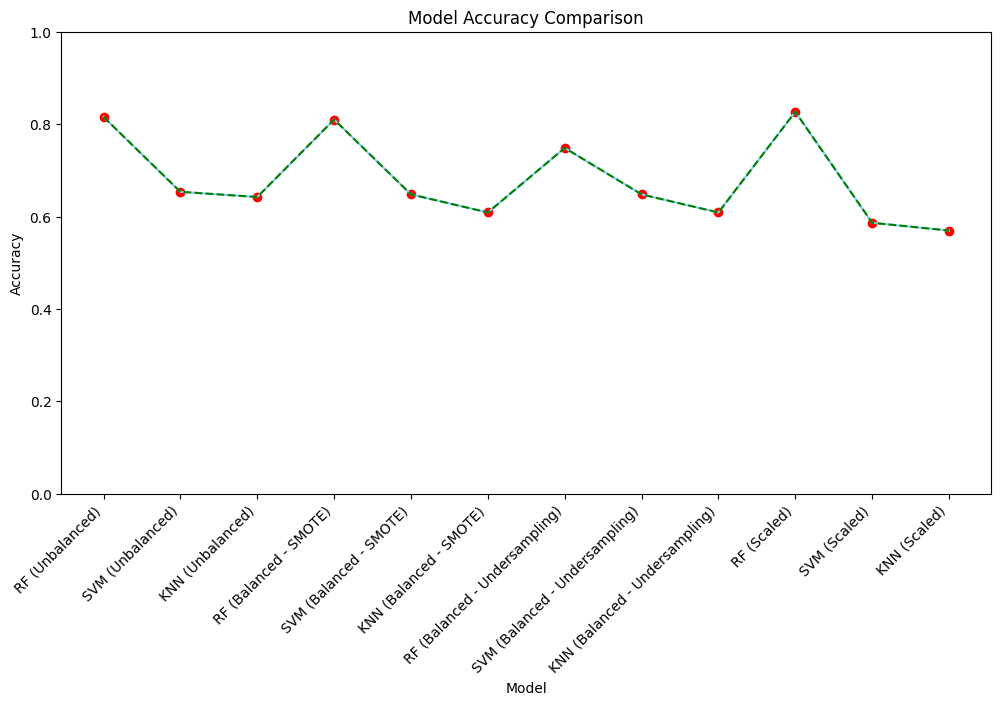

In [279]:
accuracy_scores = {
    'RF (Unbalanced)': accuracy_score(Y_test, Y_pred_RF),
    'SVM (Unbalanced)': accuracy_score(Y_test, Y_pred_svm),
    'KNN (Unbalanced)': accuracy_score(Y_test, Y_pred_KNN),    
    'RF (Balanced - SMOTE)': accuracy_score(Y_test, y_pred_bal_RF),
    'SVM (Balanced - SMOTE)': accuracy_score(Y_test, y_pred_bal_svm),
    'KNN (Balanced - SMOTE)': accuracy_score(Y_test, y_pred_bal_KNN),
    'RF (Balanced - Undersampling)': accuracy_score(Y_test, y_pred_under),
    'SVM (Balanced - Undersampling)': accuracy_score(Y_test, y_pred_bal_svm),
    'KNN (Balanced - Undersampling)': accuracy_score(Y_test, y_pred_bal_KNN),
    'RF (Scaled)': accuracy_score(Y_test_scal, Y_pred_scal_RF),
    'SVM (Scaled)': accuracy_score(Y_test_scal, Y_pred_scal_svm),
    'KNN (Scaled)': accuracy_score(Y_test_scal, Y_pred_scal_KNN)
}

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.scatter(accuracy_scores.keys(), accuracy_scores.values(), color='red', label='Predicted Points')  # Dots on predictions
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), label='Actual Values', color='green', linestyle='--')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()